In [1]:
%cd C:/Users/Mathieu/Desktop/Projets/Benter

C:\Users\Mathieu\Desktop\Projets\Benter


In [2]:
# comapre old with current featured data
%matplotlib inline
    
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns

from utils import import_data
from utils import preprocess
from constants import SOURCE_PMU

sns.set(style="ticks", context="talk")

In [3]:
race_horse_df = import_data.load_featured_data(source=SOURCE_PMU)

C:\Users\Mathieu\Anaconda3\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (35,46,47,61,62,63,64,87) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [6]:
rh_df=race_horse_df

In [9]:
%%time
for n_horses in tqdm(range(2, 20)):

    n_horse_per_race = rh_df.groupby("race_id")["n_horses"].first()
    n_horse_per_race_id = n_horse_per_race[n_horse_per_race == n_horses].index

    x = []
    y = []
    odds = []
    for race_id in n_horse_per_race_id:
        race_df = rh_df[rh_df.race_id == race_id]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [10:33<00:00, 35.22s/it]


Wall time: 10min 34s


In [16]:
%%time
for n_horses in tqdm(range(2, 20)):
    x = []
    y = []
    odds = []
    for race_id, race_df in rh_df[rh_df['n_horses'] == n_horses].groupby('race_id'):
        continue

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:25<00:00,  4.77s/it]


Wall time: 1min 25s


In [ ]:
n_horses=2
n_horse_per_race = rh_df.groupby("race_id")["n_horses"].first()
n_horse_per_race_id = n_horse_per_race[n_horse_per_race == n_horses].index

x = []
y = []
odds = []
for race_id in n_horse_per_race_id:
    race_df = rh_df[rh_df.race_id == race_id]
    print(race_id, race_df)

In [ ]:
for race_id, race_df in rh_df[rh_df['n_horses'] == n_horses].groupby('race_id'):
    print(race_id, race_df)

In [4]:
x_race = preprocess.preprocess(race_horse_df=race_horse_df[race_horse_df.race_id==1], source=SOURCE_PMU)

if np.isnan(x_race.values).mean() > MAX_NAN_PROP:
    print(None, None, None)

C:\Users\Mathieu\Anaconda3\envs\deeplearning\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Mathieu\Desktop\Projets\Benter\utils\preprocess.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ) / standard_scaler_parameters[numerical_feature]["std"]
C:\Users\Mathieu\Desktop\Projets\Benter\utils\preprocess.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [16]:
x_race.shape

(13, 49)

In [15]:
features_df.unshod.value_counts(dropna=False)race_horse_df

NaN                               23064433
DEFERRE_ANTERIEURS_POSTERIEURS      174584
DEFERRE_POSTERIEURS                  75685
DEFERRE_ANTERIEURS                   34267
REFERRE_ANTERIEURS_POSTERIEURS         455
Name: unshod, dtype: int64

In [13]:
features_df.course_track_type.value_counts(dropna=False)

NaN           23092087
HERBE           153335
GAZON            91070
POUZZOLANE        9987
SABLE             2907
DIRT                38
Name: course_track_type, dtype: int64

In [61]:
race_df=race_horse_df.groupby('race_id')['placeCorde'].agg('mean').to_frame()

In [62]:
race_df['n_horses']=race_horse_df.groupby('race_id')['n_horses'].agg('first')

In [63]:
race_df

,placeCorde,n_horses
race_id,,
0,8.5,16
1,7.0,13
2,NaN,10
3,NaN,7
4,8.5,16
...,...,...
117500,7.5,13
117501,8.0,11
117502,7.5,10


In [43]:
race_horse_df['indicateurInedit'].value_counts(dropna=False)

False    1414069
True       45270
Name: indicateurInedit, dtype: int64

In [45]:
race_horse_df['horse_sex'].value_counts(dropna=False)

HONGRES     651433
FEMELLES    557856
MALES       250050
Name: horse_sex, dtype: int64

In [37]:
race_horse_df['course_track_type'].value_counts(dropna=False)

NaN           1202002
HERBE          153335
GAZON           91070
POUZZOLANE       9987
SABLE            2907
DIRT               38
Name: course_track_type, dtype: int64

In [36]:
race_horse_df['course_condition_age'].value_counts(dropna=False)

NaN                      849412
TROIS_ANS                148696
QUATRE_ANS_ET_PLUS       137884
TROIS_ANS_ET_PLUS        102474
CINQ_ANS_ET_PLUS          73196
QUATRE_ANS                64055
DEUX_ANS                  45802
DEUX_ANS_ET_PLUS          12516
CINQ_ANS                   8871
QUATRE_CINQ_ANS            8707
SIX_ANS_ET_PLUS            3038
CINQ_SIX_ANS               2028
DEUX_ET_TROIS_ANS           977
TROIS_QUATRE_CINQ_ANS       807
INCONNU                     366
QUATE_CINQ_SIX_ANS          332
SIX_ANS                     125
DEUX_TROIS_QUATRE_ANS        53
Name: course_condition_age, dtype: int64

In [27]:
race_horse_df['course_condition_sexe'].value_counts(dropna=False)

TOUS_CHEVAUX           1064272
FEMELLES                215079
MALES_ET_HONGRES        166432
FEMELLES_ET_MALES         8528
MALES                     4944
FEMELLES_ET_HONGRES         70
HONGRES                     14
Name: course_condition_sexe, dtype: int64

In [29]:
race_horse_df['poidsConditionMonte'].value_counts(dropna=False)

NaN      1340526
545.0       6488
565.0       6353
555.0       6278
640.0       6244
          ...   
57.0           1
632.0          1
633.0          1
55.0           1
511.0          1
Name: poidsConditionMonte, Length: 151, dtype: int64

In [35]:
race_horse_df['handicap_value'].value_counts(dropna=False)

NaN     1178113
31.0       7085
28.0       6676
30.0       6576
29.0       6477
         ...   
2.0           5
82.5          3
86.0          3
78.5          3
81.5          1
Name: handicap_value, Length: 167, dtype: int64

In [32]:
race_horse_df['blinkers'].value_counts(dropna=False)

SANS_OEILLERES             1165444
NaN                         154930
OEILLERES_CLASSIQUE          77370
OEILLERES_AUSTRALIENNES      61595
Name: blinkers, dtype: int64

In [33]:
race_horse_df['ecurie'].value_counts(dropna=False)

NaN    1395724
A        53442
B         8796
C         1063
0          184
D          116
E           13
0.0          1
Name: ecurie, dtype: int64

In [34]:
race_horse_df['unshod'].value_counts(dropna=False)

NaN                               1174348
DEFERRE_ANTERIEURS_POSTERIEURS     174584
DEFERRE_POSTERIEURS                 75685
DEFERRE_ANTERIEURS                  34267
REFERRE_ANTERIEURS_POSTERIEURS        455
Name: unshod, dtype: int64

In [23]:
race_horse_df['course_distance_unit'].value_counts(dropna=False)

METRE    1459339
Name: course_distance_unit, dtype: int64

In [22]:
race_horse_df['allure'].value_counts(dropna=False)

TROT     849368
GALOP    609971
Name: allure, dtype: int64

In [21]:
race_horse_df['course_corde'].value_counts(dropna=False)

CORDE_GAUCHE    670257
CORDE_DROITE    581389
NaN             207693
Name: course_corde, dtype: int64

In [25]:
race_horse_df['course_discipline'].value_counts(dropna=False)

ATTELE          736872
PLAT            495516
MONTE           112496
HAIE             67527
STEEPLECHASE     40776
CROSS             6152
Name: course_discipline, dtype: int64

In [26]:
race_horse_df['course_specialite'].value_counts(dropna=False)

TROT_ATTELE    736872
PLAT           495516
OBSTACLE       114455
TROT_MONTE     112496
Name: course_specialite, dtype: int64

In [19]:
race_horse_df['handicap_weight'].sample(10)

1448688      NaN
394225       NaN
835251       NaN
317891     600.0
1277615    550.0
1059874    580.0
337637       NaN
366851       NaN
333375     555.0
942867     520.0
Name: handicap_weight, dtype: float64

### Extract features

DONE v1

    win rate horse, jockey, trainer
    mean place horse, jockey, trainer
    horse_age, horse_sex
    horse race
    pregnant
    breeder
    unshod
    corde
    parcours
    blinker
    handicap
    gains en cours, carrière, année précédente, 
    enjeu de la course (pool prize, winner prize)
    weight, actual weights
    driver
    race_type
    état du sol (type sol, penetrometre)
    duration since last race -> performance.json (remaining to compute timedelta between last_race and date)
    

TODO

    ecuries
From programme

    numéro course jockey dans la journée
    nombre de course courus par le jockey dans la journée
    
From past races

    expérience: nombre de course du cheval/horse/trainer dans l'historique
    inédit pour cheval (or in partipants), jockey,trainer
    new race type for horse, jockey, trainer
    number of days since last race (horse  from perforamnce.json)
    last race position    
    previous horse speed
    mean speed (bins?)
    max speed (bins?)
    elo ranking horse, jockey, trainer (from historic)
    max elo ranking father/mother/father_mother
    track draw advatage from historic 
    already race together horse+driver
    
directly in course

    
in participants
    



In [17]:
race_horse_df['age'].value_counts()

4     347731
3     290980
5     262594
6     187223
7     138325
8      93448
2      53517
9      52931
10     22012
11      6645
12      2640
13       955
14       277
15        46
0          8
1          4
16         2
60         1
Name: age, dtype: int64

In [27]:
race_horse_df.horse_sex.value_counts()

HONGRES     651433
FEMELLES    557856
MALES       250050
Name: horse_sex, dtype: int64

In [38]:
race_horse_df.gainsCarriere.apply(np.log)

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
1459334    11.287279
1459335    10.745055
1459336    11.985426
1459337    11.935575
1459338    10.742897
Name: gainsCarriere, Length: 1459339, dtype: float64

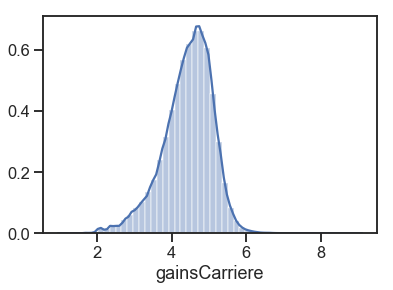

In [42]:
sns.distplot((race_horse_df.gainsCarriere/100).apply(np.log10).replace([np.inf, -np.inf], np.nan));

In [44]:
(race_horse_df.gainsCarriere==0).mean()

0.07424525761320708

In [41]:
race_horse_df.gainsCarriere.isna().mean()

0.15526961178999532

In [93]:

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(race_horse_df[race_horse_df['handicapValeur'].notna()].sample(1).T)

                                                                     1138429
horse_name                                                ECLAIR DES BRIERES
horse_number                                                               1
age                                                                        4
horse_sex                                                            HONGRES
race                                                                PUR-SANG
statut                                                               PARTANT
placeCorde                                                               NaN
owner                                                               D.LEPAGE
trainer                                                            S.FOUCHER
jockey                                                           E. METIVIER
driverChange                                                           False
tauxReclamation                                                          NaN

In [101]:
utils.load_json('./data/PMU/2018-08-20/programme.json')['programme']['reunions'][0]['courses'][0].keys()

dict_keys(['cached', 'arriveeDefinitive', 'departImminent', 'timezoneOffset', 'numReunion', 'numOrdre', 'numExterne', 'heureDepart', 'libelle', 'libelleCourt', 'montantPrix', 'parcours', 'distance', 'distanceUnit', 'corde', 'discipline', 'specialite', 'categorieParticularite', 'conditionAge', 'conditionSexe', 'nombreDeclaresPartants', 'grandPrixNationalTrot', 'numSocieteMere', 'pariMultiCourses', 'pariSpecial', 'montantTotalOffert', 'montantOffert1er', 'montantOffert2eme', 'montantOffert3eme', 'montantOffert4eme', 'montantOffert5eme', 'conditions', 'numCourseDedoublee', 'paris', 'typePiste', 'statut', 'categorieStatut', 'dureeCourse', 'participants', 'ecuries', 'penetrometre', 'rapportsDefinitifsDisponibles', 'isArriveeDefinitive', 'isDepartImminent', 'isDepartAJPlusUn', 'cagnottes', 'pronosticsExpires', 'replayDisponible', 'hippodrome', 'epcPourTousParis', 'courseTrackee', 'formuleChampLibreIndisponible', 'ordreArrivee', 'hasEParis'])

In [114]:
len(utils.load_json('./data/PMU/2018-08-20/R1_C8_performance.json')['participants'][0]['coursesCourues'])

10

In [64]:
sorted(race_horse_df.columns)

['age',
 'allure',
 'condition_sexe',
 'course_corde',
 'course_discipline',
 'course_hippodrome',
 'course_specialite',
 'course_statut',
 'date',
 'deferre',
 'driverChange',
 'ecurie',
 'eleveur',
 'engagement',
 'father_horse_id',
 'father_horse_name',
 'father_mother_horse_id',
 'father_mother_horse_name',
 'gainsAnneeEnCours',
 'gainsAnneePrecedente',
 'gainsCarriere',
 'gainsPlace',
 'gainsVictoires',
 'handicapDistance',
 'handicapPoids',
 'handicapValeur',
 'horse_id',
 'horse_name',
 'horse_number',
 'horse_place',
 'horse_sex',
 'in_incident',
 'incident',
 'incident_type',
 'indicateurInedit',
 'jockey',
 'jockey_mean_place',
 'jockey_win_rate',
 'jumentPleine',
 'mean_place',
 'mother_horse_id',
 'mother_horse_name',
 'musique',
 'n_course',
 'n_horses',
 'n_placed_races',
 'n_reunion',
 'n_run_races',
 'n_won_races',
 'nombrePlacesSecond',
 'nombrePlacesTroisieme',
 'odds',
 'oeilleres',
 'owner',
 'pari_mutuel_proba',
 'placeCorde',
 'poidsConditionMonte',
 'poidsConditi

In [54]:
race_horse_df[race_horse_df['statut']=='PARTANT']['deferre'].value_counts()

DEFERRE_ANTERIEURS_POSTERIEURS    170904
DEFERRE_POSTERIEURS                73933
DEFERRE_ANTERIEURS                 33394
REFERRE_ANTERIEURS_POSTERIEURS       446
Name: deferre, dtype: int64

In [58]:
race_horse_df[race_horse_df['statut']=='PARTANT']['deferre'].sample(10)

1415119                               NaN
1155945                               NaN
140478                                NaN
1011206                               NaN
301207                                NaN
1093830    DEFERRE_ANTERIEURS_POSTERIEURS
1082228                               NaN
642203                                NaN
399080                                NaN
1192854                               NaN
Name: deferre, dtype: object

In [57]:
race_horse_df[race_horse_df['deferre']=="REFERRE_ANTERIEURS_POSTERIEURS"].sample(1)[["date", "n_reunion", "n_course", "horse_number"]]

,date,n_reunion,n_course,horse_number
1441661,2020-03-24,1,7,3


In [67]:
import utils
programme_json=utils.load_json('data/PMU/2020-03-05/programme.json')['programme']

In [94]:
programme_json['reunions'][0]['courses'][0]

{'arriveeDefinitive': True,
 'cached': False,
 'cagnottes': [],
 'categorieParticularite': 'INCONNU',
 'categorieStatut': 'ARRIVEE',
 'conditionSexe': 'FEMELLES',
 'conditions': "PRIX DE BIEVILLE Course  8 Course D 32.000. - Attelé, femelles. - 2.450 mètres. 14.400, 8.000, 4.480, 2.560, 1.600, 640, 320. Pour juments de 4 et 5 ans, n'ayant pas gagné 75.000.",
 'corde': 'CORDE_DROITE',
 'courseTrackee': False,
 'departImminent': False,
 'discipline': 'ATTELE',
 'distance': 2450,
 'distanceUnit': 'METRE',
 'dureeCourse': 178120,
 'ecuries': [],
 'epcPourTousParis': True,
 'formuleChampLibreIndisponible': False,
 'grandPrixNationalTrot': False,
 'hasEParis': True,
 'heureDepart': 1583412600000,
 'hippodrome': {'codeHippodrome': 'CAE',
  'libelleCourt': 'CAEN',
  'libelleLong': 'HIPPODROME DE CAEN'},
 'incidents': [{'numeroParticipants': [3, 5, 13],
   'type': 'DISQUALIFIE_POUR_ALLURE_IRREGULIERE'}],
 'isArriveeDefinitive': True,
 'isDepartAJPlusUn': False,
 'isDepartImminent': False,
 'lib

In [80]:
participants_json=utils.load_json('data/PMU/2020-03-05/R1_C1_participants.json')['participants']

In [82]:
participants_json[0]

{'age': 4,
 'allure': 'TROT',
 'dernierRapportDirect': {'dateRapport': 1583412683000,
  'favoris': False,
  'grossePrise': False,
  'indicateurTendance': ' ',
  'nombreIndicateurTendance': 0.0,
  'numPmu1': 1,
  'permutation': 1,
  'rapport': 68.0,
  'typePari': 'SIMPLE_GAGNANT',
  'typeRapport': 'DIRECT'},
 'dernierRapportReference': {'dateRapport': 1583410805000,
  'favoris': False,
  'grossePrise': False,
  'indicateurTendance': '-',
  'nombreIndicateurTendance': -0.85,
  'numPmu1': 1,
  'permutation': 1,
  'rapport': 46.0,
  'typePari': 'SIMPLE_GAGNANT',
  'typeRapport': 'REFERENCE'},
 'driver': 'CH. THIERRY',
 'driverChange': False,
 'eleveur': 'Ecurie de BLARY',
 'engagement': False,
 'entraineur': 'S. GUARATO',
 'gainsParticipant': {'gainsAnneeEnCours': 0,
  'gainsAnneePrecedente': 3515000,
  'gainsCarriere': 5007000,
  'gainsPlace': 4422000,
  'gainsVictoires': 585000},
 'handicapDistance': 2450,
 'indicateurInedit': False,
 'jumentPleine': False,
 'musique': '(19)8aDa7a3a4a2a2

In [116]:
performance_json=utils.load_json('data/PMU/2020-03-05/R1_C1_performance.json')

In [119]:
performance_json['participants'][0].keys()

dict_keys(['numPmu', 'nomCheval', 'coursesCourues'])

In [ ]:


from constants import PMU_DATA_DIR
import os
import json
import utils
import re
from tqdm import tqdm
import datetime as dt
from typing import Optional

def get_penetrometer_value(course: dict) -> Optional[float]:
    if "penetrometre" not in course:
        return None
    if "valeurMesure" not in course["penetrometre"]:
        return None
    penetrometer_value: str = course["penetrometre"]["valeurMesure"]
    penetrometer_value = penetrometer_value.replace(",", ".")
    return float(penetrometer_value)

stop=False

for date in tqdm(
    iterable=os.listdir(PMU_DATA_DIR), desc="Loading races per date", unit="day"
):
    if date == ".ipynb_checkpoints":
        continue

    assert re.match(r"\d{4}-\d{2}-\d{2}", date)

    folder_path = os.path.join(PMU_DATA_DIR, date)

    programme_json = utils.load_json(
        filename=os.path.join(folder_path, "programme.json")
    )

    if (
        programme_json is None
        or "programme" not in programme_json
        or "reunions" not in programme_json["programme"]
    ):
        continue

    for reunion in programme_json["programme"]["reunions"]:
        for course in reunion["courses"]:
            if course["statut"] in [
                "COURSE_ANNULEE",
                "PROGRAMMEE",
                "ARRIVEE_PROVISOIRE",
                "COURSE_ANNULEE",
                "DEPART_CONFIRME",
                "DEPART_DANS_TROIS_MINUTES",
            ]:
                continue
            assert course["statut"] in [
                "FIN_COURSE",
                "ARRIVEE_DEFINITIVE",
                "ARRIVEE_DEFINITIVE_COMPLETE",
                "COURSE_ARRETEE",
            ], course["statut"]
            r_i = course["numReunion"]
            c_i = course["numOrdre"]
            
            penetrometer_value = get_penetrometer_value(course)
            if penetrometer_value:
                print(penetrometer_value)

In [41]:
penetrometer_value

In [5]:
from constants import PMU_DATA_DIR
import os
import json
import utils
import re
from tqdm import tqdm
import datetime as dt

stop=False

for date in tqdm(
    iterable=os.listdir(PMU_DATA_DIR), desc="Loading races per date", unit="day"
):
    if date == ".ipynb_checkpoints":
        continue

    assert re.match(r"\d{4}-\d{2}-\d{2}", date)

    folder_path = os.path.join(PMU_DATA_DIR, date)

    programme_json = utils.load_json(
        filename=os.path.join(folder_path, "programme.json")
    )

    if (
        programme_json is None
        or "programme" not in programme_json
        or "reunions" not in programme_json["programme"]
    ):
        continue

    for reunion in programme_json["programme"]["reunions"]:
        for course in reunion["courses"]:
            if course["statut"] in [
                "COURSE_ANNULEE",
                "PROGRAMMEE",
                "ARRIVEE_PROVISOIRE",
                "COURSE_ANNULEE",
                "DEPART_CONFIRME",
                "DEPART_DANS_TROIS_MINUTES",
            ]:
                continue
            assert course["statut"] in [
                "FIN_COURSE",
                "ARRIVEE_DEFINITIVE",
                "ARRIVEE_DEFINITIVE_COMPLETE",
                "COURSE_ARRETEE",
            ], course["statut"]
            r_i = course["numReunion"]
            c_i = course["numOrdre"]
            
            performance_json = utils.load_json(filename=os.path.join(folder_path, f"R{r_i}_C{c_i}_performance.json"))
            participants_ = utils.load_json(
                filename=os.path.join(
                    folder_path, f"R{r_i}_C{c_i}_participants.json"
                )
            )
            if participants_ is None or "participants" not in participants_:
                continue
            participants_ = participants_["participants"]
            participants = [
                {k: v for k, v in part.items() if not isinstance(v, dict)}
                for part in participants_
            ]
            last_race_date = get_last_race_date(performance_json=performance_json, participants=participants)
            if last_race_date is not None:
                stop = True
            
            if stop:
                break
        
        if stop:
            break
    if stop:
        break

Loading races per date:   9%|██████████████▌                                                                                                                                                       | 233/2654 [00:22<03:58, 10.14day/s]

In [6]:
last_race_date

{1: datetime.date(2013, 8, 30),
 3: datetime.date(2013, 10, 6),
 4: datetime.date(2013, 9, 26),
 5: datetime.date(2013, 9, 20)}

In [2]:
def get_num_from_name(horse_name, participants):
    horse_ = [part for part in participants if part['nom']==horse_name]
    if len(horse_)!=1:
        return None
    horse=horse_[0]
    if 'numPmu' not in horse:
        return None
    return horse['numPmu']

In [3]:
def get_last_race_date(performance_json, participants=None):

    if 'participants' not in performance_json:
        return None
            
    res={}
    for perf in performance_json['participants']:
        if 'coursesCourues' not in perf:
            continue
        if 'numPmu' not in perf:
            if 'nomCheval' not in perf:
                continue
            num_pmu = get_num_from_name(horse_name=perf['nomCheval'], participants=participants)

        else:
            num_pmu = perf['numPmu']
        if num_pmu is None:
             continue
            
        if not perf['coursesCourues']:
            continue
        dates = [course['date'] for course in perf['coursesCourues'] if 'date' in course]
        if not dates:
            continue
        max_date =max(dates)
        
        res[num_pmu]=dt.date.fromtimestamp(max_date/1000)
    if not res:
        return None
    return res
    

In [29]:
performance_json['participants'][0]['coursesCourues']

[{'date': 1377813600000,
  'discipline': 'PLAT',
  'distance': 1200,
  'hippodrome': 'FONTAINEBLEAU',
  'nbParticipants': 10,
  'nomPrix': 'HERICY S/SEINE',
  'participants': [{'corde': 10,
    'itsHim': True,
    'nomCheval': 'KIRAM',
    'nomJockey': 'CP.LEMAIRE',
    'numPmu': 1,
    'oeillere': 'SANS_OEILLERES',
    'place': {'place': 1, 'statusArrivee': 'PLACE'},
    'poidsJockey': 58.0},
   {'corde': 3,
    'distanceAvecPrecedent': {'knownValue': 'ENCOLURE'},
    'itsHim': False,
    'nomCheval': 'OROMO',
    'nomJockey': 'C.SOUMILLON',
    'numPmu': 2,
    'oeillere': 'SANS_OEILLERES',
    'place': {'place': 2, 'statusArrivee': 'PLACE'},
    'poidsJockey': 58.0},
   {'corde': 7,
    'distanceAvecPrecedent': {'knownValue': 'TROIS_LONGUEURS'},
    'itsHim': False,
    'nomCheval': "SIXTINE'S LUCKY",
    'nomJockey': 'M.GUYON',
    'numPmu': 4,
    'oeillere': 'SANS_OEILLERES',
    'place': {'place': 3, 'statusArrivee': 'PLACE'},
    'poidsJockey': 56.5},
   {'corde': 8,
    'dista

In [19]:
participants=utils.load_json(filename=os.path.join(folder_path, f"R{r_i}_C{c_i}_participants.json"))['participants']

In [27]:
get_num_from_name(horse_name=performance_json['participants'][0]['nomCheval'], participants=participants)

1

# Appendix

## Split by horse

In [105]:
np.random.seed(42)
selected_horse_ids=np.random.choice(a=old_featured_data.horse_id.unique(), size=int(0.001*old_featured_data.horse_id.nunique()), replace=False)

In [106]:
selected_races =old_featured_data[old_featured_data['horse_id'].isin(selected_horse_ids)|
                  old_featured_data['father_horse_id'].isin(selected_horse_ids)|
                  old_featured_data['mother_horse_id'].isin(selected_horse_ids)|
                  old_featured_data['father_mother_horse_id'].isin(selected_horse_ids)
                 ]['race_id'].unique()

In [107]:
len(selected_races)/old_featured_data['race_id'].nunique()

0.012238684107571144

## looking at clusters of horses

In [6]:
clusters=[]
for race_id in tqdm(old_featured_data['race_id'].unique(), total=old_featured_data['race_id'].nunique()):
    race_horse_ids = frozenset(old_featured_data[old_featured_data['race_id']==race_id]['horse_id'])
    intersected_clusters = [set_ for set_ in clusters if race_horse_ids.intersection(set_)]
    non_intersected_clusters = [set_ for set_ in clusters if not race_horse_ids.intersection(set_)]
    if intersected_clusters:
        unioned_cluster=race_horse_ids.union(frozenset({horse_id for set_ in intersected_clusters for horse_id in set_}))
        clusters = [unioned_cluster]
        clusters.extend(non_intersected_clusters)
    else:
        clusters.append(race_horse_ids)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117578/117578 [59:26<00:00, 32.96it/s]


In [8]:
print(len(clusters), "clusters")
for i,set_ in enumerate(clusters):
    print( "cluster:", i, "size", len(set_))

128 clusters
cluster: 0 size 161905
cluster: 1 size 32
cluster: 2 size 20
cluster: 3 size 15
cluster: 4 size 27
cluster: 5 size 14
cluster: 6 size 23
cluster: 7 size 18
cluster: 8 size 20
cluster: 9 size 13
cluster: 10 size 10
cluster: 11 size 16
cluster: 12 size 20
cluster: 13 size 12
cluster: 14 size 43
cluster: 15 size 16
cluster: 16 size 19
cluster: 17 size 4
cluster: 18 size 10
cluster: 19 size 9
cluster: 20 size 6
cluster: 21 size 8
cluster: 22 size 11
cluster: 23 size 5
cluster: 24 size 11
cluster: 25 size 8
cluster: 26 size 5
cluster: 27 size 7
cluster: 28 size 7
cluster: 29 size 13
cluster: 30 size 10
cluster: 31 size 11
cluster: 32 size 15
cluster: 33 size 14
cluster: 34 size 7
cluster: 35 size 8
cluster: 36 size 6
cluster: 37 size 21
cluster: 38 size 9
cluster: 39 size 14
cluster: 40 size 12
cluster: 41 size 15
cluster: 42 size 8
cluster: 43 size 11
cluster: 44 size 8
cluster: 45 size 6
cluster: 46 size 11
cluster: 47 size 16
cluster: 48 size 11
cluster: 49 size 12
cluster: 

## Tentative Multiprocessed Aggregate PMU data

In [ ]:
%%time

from multiprocessing import Pool

def get_race_horse_features(
    rh_serie: pd.Series, jockey_history: pd.DataFrame, trainer_history: pd.DataFrame
):
    parsed_music = parse_music(music=rh_serie.musique)

    win_rate = parsed_music.win_rate

    if "n_run_races" in rh_serie and "n_won_races" in rh_serie:
        win_rate = (
            None
            if rh_serie["n_run_races"] == 0.0
            else rh_serie["n_won_races"] / rh_serie["n_run_races"]
        )

    previous_jockey_races = jockey_history[
        jockey_history.race_datetime < rh_serie.race_datetime
    ]
    jockey_win_rate = (previous_jockey_races.horse_place == 1).mean()
    jockey_mean_place = previous_jockey_races.horse_place.mean()

    previous_trainer_races = trainer_history[
        trainer_history.race_datetime < rh_serie.race_datetime
    ]
    trainer_win_rate = (previous_trainer_races.horse_place == 1).mean()
    trainer_mean_place = previous_trainer_races.horse_place.mean()

    return {
        "win_ratio": win_rate,
        "mean_place": parsed_music.mean_place,
        "jockey_win_rate": jockey_win_rate,
        "jockey_mean_place": jockey_mean_place,
        "trainer_win_rate": trainer_win_rate,
        "trainer_mean_place": trainer_mean_place,
    }

@functools.lru_cache(maxsize=None)
def get_jockey_history(jockey_name: str) -> pd.DataFrame:
    return race_horse_df[race_horse_df["jockey"] == jockey_name][
        ["race_datetime", "horse_place"]
    ].dropna(axis=0)

@functools.lru_cache(maxsize=None)
def get_trainer_history(trainer_name: str) -> pd.DataFrame:
    return race_horse_df[race_horse_df["trainer"] == trainer_name][
        ["race_datetime", "horse_place"]
    ].dropna(axis=0)

def _get_feature_record(t)->dict:
    index, rh_serie = t
    features_dict = get_race_horse_features(
        rh_serie=rh_serie,
        jockey_history=get_jockey_history(jockey_name=rh_serie.jockey),
        trainer_history=get_trainer_history(trainer_name=rh_serie.trainer),
    )
    features_dict.update({"Index": index})
    return features_dict

"""pbar = tqdm(total=len(race_horse_df), leave=False)

def pbar_callback(*a):
    pbar.update()
"""
with Pool() as p:
    records = p.map(func=_get_feature_record, iterable=race_horse_df[:100].iterrows())

#res = race_horse_df.join(pd.DataFrame(records).set_index("Index"))


### Get dick keys

In [ ]:
dict_keys = set()

for date in tqdm(os.listdir(PMU_DATA_DIR)):
    if date == ".ipynb_checkpoints":
        continue

    assert re.match(r"\d{4}-\d{2}-\d{2}", date)

    folder_path = os.path.join(PMU_DATA_DIR, date)

    programme_json = utils.load_json(
        filename=os.path.join(folder_path, "programme.json")
    )

    if (
        "programme" not in programme_json
        or "reunions" not in programme_json["programme"]
    ):
        continue
    participants = None

    for reunion in programme_json["programme"]["reunions"]:
        for course in reunion["courses"]:
            r_i = course["numReunion"]
            c_i = course["numOrdre"]


            participants_ = utils.load_json(
                filename=os.path.join(
                    folder_path, f"R{r_i}_C{c_i}_participants.json"
                )
            )
            if "participants" not in participants_:
                continue
            dict_keys |= {k for part in participants_['participants'] for k, v in part.items()if isinstance(v, dict)}
dict_keys

In [ ]:
### Incident types

In [ ]:
incident_types =set()

for date in tqdm(os.listdir(PMU_DATA_DIR)):
    if date == '.ipynb_checkpoints':
        continue
    if date == '2013-02-20':
        continue

    assert re.match(r'\d{4}-\d{2}-\d{2}', date)
    
    folder_path = os.path.join(PMU_DATA_DIR, date)
        
    programme_json = utils.load_json(filename=os.path.join(folder_path, "programme.json"))
        
    if 'programme' not in programme_json or not 'reunions' in programme_json['programme']:
        continue
    participants=None
    
    for reunion in programme_json['programme']['reunions']:
        for course in reunion['courses']:
            if 'incidents' in course:
                for pari in course['incidents']:
                    incident_types.add(pari['type'])

incident_types

### lot of values

In [48]:
from tqdm import tqdm
from collections import Counter
import os
from constants import PMU_DATA_DIR
import re
import utils

status=set()
status_counter = Counter()
reunion_nature=Counter()
reunion_audience =Counter()
reunion_pays = Counter()
course_hippodrome= Counter()
course_discipline= Counter()
course_specialite = Counter()
course_condition_sexe = Counter()
course_corde = Counter()

for date in tqdm(os.listdir(PMU_DATA_DIR)):
    if date == ".ipynb_checkpoints":
        continue
    assert re.match(r"\d{4}-\d{2}-\d{2}", date)

    folder_path = os.path.join(PMU_DATA_DIR, date)

    programme_json = utils.load_json(
    filename=os.path.join(folder_path, "programme.json")
    )

    if (
        programme_json is None or
    "programme" not in programme_json
    or "reunions" not in programme_json["programme"]
    ):
   
        continue
    
    # TODO check course statut TERMINEE or ROUGE_a
    for reunion in programme_json["programme"]["reunions"]:
        reunion_nature[reunion['nature']]+=1
        reunion_audience[reunion['audience']]+=1
        reunion_pays[reunion['pays']['code']]+=1
        
        for course in reunion["courses"]:
            status.add(course['statut'])
            status_counter[course['statut']]+=1
            course_discipline[course['discipline']]+=1
            course_specialite[course['specialite']]+=1
            course_condition_sexe[course['conditionSexe']]+=1
            if 'corde' in course:
                course_corde[course['corde']]+=1
            if 'hippodrome' in course:
                course_hippodrome[course['hippodrome']['codeHippodrome']]+=1
    


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2635/2635 [00:21<00:00, 120.50it/s]

In [9]:
status

{'ARRIVEE_DEFINITIVE',
 'ARRIVEE_DEFINITIVE_COMPLETE',
 'ARRIVEE_PROVISOIRE',
 'COURSE_ANNULEE',
 'COURSE_ARRETEE',
 'DEPART_CONFIRME',
 'DEPART_DANS_TROIS_MINUTES',
 'FIN_COURSE',
 'PROGRAMMEE'}

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 2620/2635 [00:40<00:00, 65.34it/s]

In [49]:
status_counter

Counter({'ARRIVEE_DEFINITIVE': 23,
         'ARRIVEE_DEFINITIVE_COMPLETE': 7545,
         'ARRIVEE_PROVISOIRE': 7,
         'COURSE_ANNULEE': 686,
         'COURSE_ARRETEE': 6,
         'DEPART_CONFIRME': 2,
         'DEPART_DANS_TROIS_MINUTES': 2,
         'FIN_COURSE': 109931,
         'PROGRAMMEE': 12})

In [50]:
reunion_nature

Counter({'DIURNE': 10662, 'NOCTURNE': 1597, 'SEMINOCTURNE': 5022})

In [51]:
reunion_audience

Counter({'LOCAL': 1265, 'NATIONAL': 14354, 'REGIONAL': 1662})

In [52]:
reunion_pays

Counter({'ALLEMAGNE': 734,
         'AUTRICHE': 143,
         'Afrique du Sud': 482,
         'Argentine': 58,
         'Australie': 223,
         'Belgique': 420,
         'Brésil': 14,
         'Chili': 300,
         'Chine': 57,
         'Corée, République': 7,
         'Danemark': 14,
         'Emirats arabes unis': 117,
         'Espagne': 290,
         'Etats-Unis': 205,
         'FRANCE': 12228,
         'Finlande': 25,
         'Indetermine': 78,
         'Irlande': 144,
         'Italie': 26,
         'Japon': 7,
         'Malte': 9,
         'Maroc': 27,
         'Maurice': 2,
         'NOUVELLE CALEDONIE': 2,
         'Norvège': 93,
         'Nouvelle-Zélande': 3,
         'Pays-Bas': 226,
         'Pérou': 26,
         'Qatar': 1,
         'Royaume-Uni': 586,
         'SUISSE': 322,
         'Singapour': 126,
         'Suède': 164,
         'Tchèque, République': 7,
         'Turquie': 2,
         'Uruguay': 113})

In [53]:
course_discipline

Counter({'ATTELE': 54168,
         'CROSS': 670,
         'HAIE': 6136,
         'MONTE': 8436,
         'PLAT': 44539,
         'STEEPLECHASE': 4265})

In [54]:
course_specialite

Counter({'OBSTACLE': 11071,
         'PLAT': 44539,
         'TROT_ATTELE': 54168,
         'TROT_MONTE': 8436})

In [55]:
course_condition_sexe

Counter({'FEMELLES': 17021,
         'FEMELLES_ET_HONGRES': 7,
         'FEMELLES_ET_MALES': 786,
         'HONGRES': 1,
         'MALES': 476,
         'MALES_ET_HONGRES': 12880,
         'TOUS_CHEVAUX': 87043})

In [56]:
course_corde

Counter({'CORDE_DROITE': 46173, 'CORDE_GAUCHE': 52991})

In [57]:
course_hippodrome

Counter({'AALBORG': 29,
         'ABY GOTEBORG': 112,
         'ADDINGTON': 2,
         'AGEN LA GARENNE': 1393,
         'AGON-COUTAINVILLE': 13,
         'AINTREE': 72,
         'AIX LES BAINS': 549,
         'AJACCIO': 13,
         'ALBANY AUSTRALIE': 8,
         'ALENCON': 25,
         'ALEXANDRA PARK': 3,
         'AMAL SUÈDE': 8,
         'AMIENS': 1386,
         'ANGERS': 1123,
         'ANGOULEME': 33,
         'AQUEDUCT': 36,
         'ARGENTAN': 1088,
         'ARJANG (SUEDE)': 21,
         'ARLINGTON': 4,
         'ARRAS': 12,
         'ASCOT': 232,
         'AUCH': 14,
         'AUTEUIL': 2182,
         'AUTEUIL MIDI': 3,
         'AVENCHES': 1658,
         'AVENCHES SOIR': 17,
         'AVIGNON': 85,
         'AXEVALLA': 50,
         'AYR': 19,
         'BAD DOBERAN': 29,
         'BAD HARZBURG': 65,
         'BADEN-BADEN': 165,
         'BADEN-VIENNE': 135,
         'BALLARAT': 17,
         'BATH': 12,
         'BEAUMONT DE LOMAGNE': 865,
         'BELMONT PARK': 31,
    

### Get one race

In [12]:
for date in tqdm(os.listdir(PMU_DATA_DIR)):
    if date == ".ipynb_checkpoints":
        continue
    assert re.match(r"\d{4}-\d{2}-\d{2}", date)

    folder_path = os.path.join(PMU_DATA_DIR, date)

    programme_json = utils.load_json(
    filename=os.path.join(folder_path, "programme.json")
    )

    if (
        programme_json is None or
    "programme" not in programme_json
    or "reunions" not in programme_json["programme"]
    ):
   
        continue
    
    # TODO check course statut TERMINEE or ROUGE_a
    for reunion in programme_json["programme"]["reunions"]:
        for course in reunion["courses"]:
            
            break
        break
    break


  0%|                                                                                                                                                                                                         | 0/2635 [00:00<?, ?it/s]


In [13]:
course

{'arriveeDefinitive': True,
 'cached': False,
 'cagnottes': [],
 'categorieParticularite': 'A_RECLAMER_AUTOSTART',
 'categorieStatut': 'ARRIVEE',
 'conditionSexe': 'TOUS_CHEVAUX',
 'conditions': 'PRIX DE SANARY-SUR-MER Course  1 Course R Course "A RECLAMER" DÃ©part Ã\xa0 l\'Autostart 20.000. - AttelÃ©. - 2.150 mÃ¨tres. 10.000, 5.000, 2.600, 1.200, 600, 400, 200. Pour 8, 9 et 10 ans (R, Q et P), Ã\xa0 rÃ©clamer pour 20.000.',
 'corde': 'CORDE_GAUCHE',
 'courseTrackee': False,
 'departImminent': False,
 'discipline': 'ATTELE',
 'distance': 2150,
 'distanceUnit': 'METRE',
 'dureeCourse': 162660,
 'ecuries': [],
 'epcPourTousParis': True,
 'formuleChampLibreIndisponible': True,
 'grandPrixNationalTrot': False,
 'hasEParis': False,
 'heureDepart': 1361376600000,
 'hippodrome': {'codeHippodrome': 'ENG',
  'libelleCourt': 'ENGHIEN',
  'libelleLong': "HIPPODROME D'ENGHIEN SOISY"},
 'incidents': [{'numeroParticipants': [3],
   'type': 'DISQUALIFIE_POUR_ALLURE_IRREGULIERE'}],
 'isArriveeDefiniti

In [16]:
reunion.keys()

dict_keys(['cached', 'timezoneOffset', 'dateReunion', 'numOfficiel', 'numOfficielReunionPrecedente', 'numOfficielReunionSuivante', 'numExterne', 'nature', 'hippodrome', 'pays', 'courses', 'audience', 'statut', 'disciplinesMere', 'specialites', 'derniereReunion', 'parisEvenement', 'offresInternet', 'cagnottes'])

In [18]:
reunion['pays']

{'code': 'FRA', 'libelle': 'FRANCE'}

In [19]:
reunion['statut']

'TERMINEE'

In [20]:
reunion['nature']

'SEMINOCTURNE'

In [21]:
reunion['audience']

'NATIONAL'

In [22]:
reunion['cagnottes']

[]

In [23]:
reunion['specialites']

['TROT_ATTELE', 'TROT_MONTE']

In [37]:
reunion.keys()

dict_keys(['cached', 'timezoneOffset', 'dateReunion', 'numOfficiel', 'numOfficielReunionPrecedente', 'numOfficielReunionSuivante', 'numExterne', 'nature', 'pays', 'courses', 'audience', 'statut', 'disciplinesMere', 'specialites', 'derniereReunion', 'parisEvenement', 'offresInternet', 'cagnottes'])

In [38]:
reunion['numOfficiel']

6

In [24]:
course.keys()

dict_keys(['cached', 'arriveeDefinitive', 'departImminent', 'timezoneOffset', 'numReunion', 'numOrdre', 'numExterne', 'heureDepart', 'libelle', 'libelleCourt', 'montantPrix', 'parcours', 'distance', 'distanceUnit', 'corde', 'discipline', 'specialite', 'categorieParticularite', 'conditionSexe', 'nombreDeclaresPartants', 'grandPrixNationalTrot', 'numSocieteMere', 'pariMultiCourses', 'pariSpecial', 'montantTotalOffert', 'montantOffert1er', 'montantOffert2eme', 'montantOffert3eme', 'montantOffert4eme', 'montantOffert5eme', 'conditions', 'numCourseDedoublee', 'paris', 'statut', 'categorieStatut', 'dureeCourse', 'participants', 'ecuries', 'incidents', 'rapportsDefinitifsDisponibles', 'isArriveeDefinitive', 'isDepartImminent', 'isDepartAJPlusUn', 'cagnottes', 'pronosticsExpires', 'replayDisponible', 'hippodrome', 'epcPourTousParis', 'courseTrackee', 'formuleChampLibreIndisponible', 'ordreArrivee', 'hasEParis'])

In [25]:
course['corde']

'CORDE_GAUCHE'

In [26]:
course['parcours']

''

In [27]:
course['discipline']

'ATTELE'

In [28]:
course['specialite']

'TROT_ATTELE'

In [39]:
course['conditionSexe']

'TOUS_CHEVAUX'

In [40]:
course['conditions']

'Pour pur sang males, hongres et femelles de trois ans et plus.'

In [43]:
course['hippodrome']

KeyError: 'hippodrome'